## The data structure is based on xarray.Dataset

PIV data requires: 
- data in 2D or 3D matrices
- coordinates for x,y or x,y,z 
- metadata that will contain the information from the header, information about the origin of the data file (image, experimental settings), units for each variables, coordinates, etc. 


Among various possibilities the most suitable one is `xarray`, or so-called N-D labeled arrays, Read more about this format in this [paper](https://openresearchsoftware.metajnl.com/articles/10.5334/jors.148/) or in their [docs](https://xarray.pydata.org/en/stable/)

In [3]:
import xarray as xr
import numpy as np

In [4]:
x = np.linspace(32.0, 128.0, 3) # 3 columns
y = np.linspace(16.0, 128.0, 4) # 4 rows

xm, ym = np.meshgrid(x, y)
u = np.ones_like(xm.T) + np.linspace(0.0, 7.0, 4)
v = (
    np.zeros_like(ym.T)
    + np.linspace(0.0, 1.0, 4)
    + np.random.rand(3, 1)
    - 0.5
)

u = u[:, :, np.newaxis]
v = v[:, :, np.newaxis]
chc = np.ones_like(u)

# plt.quiver(xm.T,ym.T,u,v)

u = xr.DataArray(
    u, dims=("x", "y", "t"), coords={"x": x, "y": y, "t": [0]}
)
v = xr.DataArray(
    v, dims=("x", "y", "t"), coords={"x": x, "y": y, "t": [0]}
)
chc = xr.DataArray(
    chc, dims=("x", "y", "t"), coords={"x": x, "y": y, "t": [0]}
)

data = xr.Dataset({"u": u, "v": v, "chc": chc})

data.attrs["variables"] = ["x", "y", "u", "v"]
data.attrs["units"] = ["pix", "pix", "pix/dt", "pix/dt"]
data.attrs["dt"] = 1.0
data.attrs["files"] = ""

data

<xarray.Dataset> Size: 352B
Dimensions:  (x: 3, y: 4, t: 1)
Coordinates:
  * x        (x) float64 24B 32.0 80.0 128.0
  * y        (y) float64 32B 16.0 53.33 90.67 128.0
  * t        (t) int64 8B 0
Data variables:
    u        (x, y, t) float64 96B 1.0 3.333 5.667 8.0 ... 1.0 3.333 5.667 8.0
    v        (x, y, t) float64 96B 0.3653 0.6986 1.032 ... 0.6156 0.9489 1.282
    chc      (x, y, t) float64 96B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    variables:  ['x', 'y', 'u', 'v']
    units:      ['pix', 'pix', 'pix/dt', 'pix/dt']
    dt:         1.0
    files:

In [5]:
### Using xarray plotting machinery 

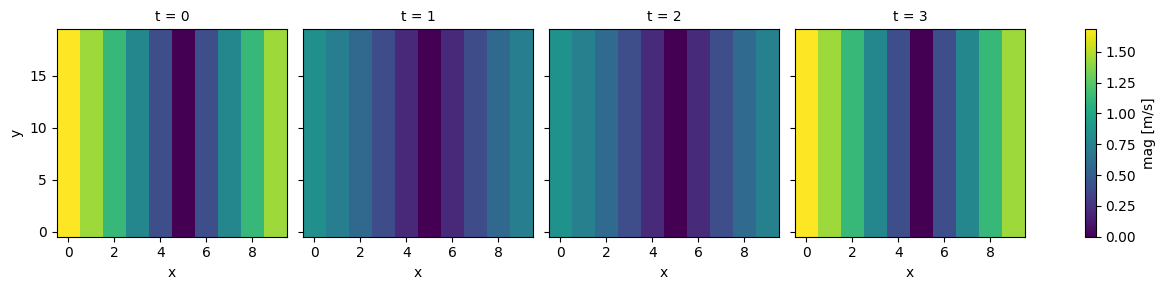

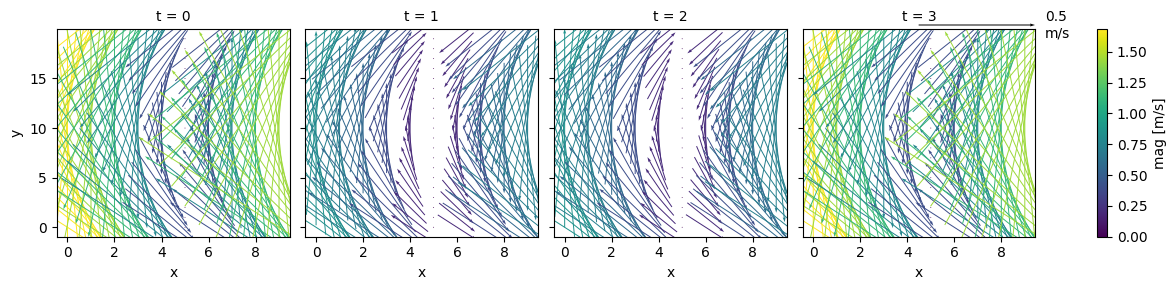

In [ ]:
import numpy as np
import xarray as xr

ds = xr.Dataset()
ds.coords["x"] = ("x", np.arange(10))
ds.coords["y"] = ("y", np.arange(20))
ds.coords["t"] = ("t", np.arange(4))
sx = xr.apply_ufunc(np.sin, (ds.x - 5) / 5)
sy = xr.apply_ufunc(np.sin, (ds.y - 10) / 10)
cy = xr.apply_ufunc(np.cos, (ds.y - 10) / 10)
ds["u"] = sx * sy
ds["v"] = sx * cy

mod = 2 * xr.apply_ufunc(np.cos, ds.t * 2 * np.pi / 0.75)
ds = ds * mod

ds["u"].attrs["units"] = "m/s"
ds["mag"] = (ds["u"] ** 2 + ds["v"] ** 2) ** 0.5

ds.mag.plot(col="t", x="x")

fg = ds.plot.quiver(x="x", y="y", u="u", v="v", col="t", hue="mag", scale=1)  # type: ignore[call-arg]

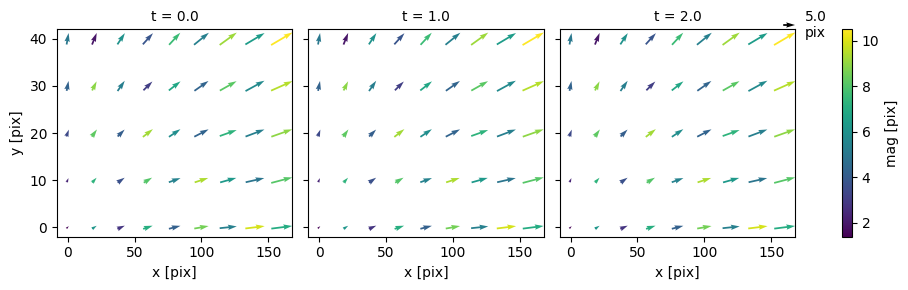

In [2]:
from pivpy import io, pivpy, graphics
ds = io.create_sample_Dataset(n_frames=3,rows=5,cols=9,noise_sigma=0.2)
ds["mag"] = (ds["u"] ** 2 + ds["v"] ** 2) ** 0.5

# using default xarray.plot.quiver 
fg = ds.plot.quiver(x="x", y="y", u="u", v="v", col="t", hue="mag", scale=100)  # type: ignore[call-arg]

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x [pix]', ylabel='y [pix]'>)

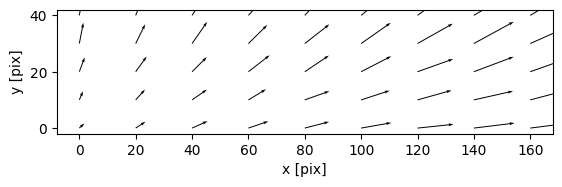

In [ ]:
# using overloaded pivpy graphics.quiver
ds.piv.quiver(scalingFactor=100)